## This is the Sentiment Analysis for Amazon Reviews of the products listed on Amazon. The reviews are entered by actual customers. The review has attributes like stars, the actual text entered, we are generating Sentiment Polarity Score basis the data.

In [84]:
#### Loading all the required libraries here
from lxml import html  
import requests
import pandas as pd
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scikitplot as skplt
import nltk
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Download all the stopwords package here

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vaibhavverdhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavverdhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vaibhavverdhan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
xpath_reviews = '//div[@data-hook="review"]'
reviews = parser.xpath(xpath_reviews)

In [11]:
xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
xpath_title   = './/a[@data-hook="review-title"]//text()'
xpath_author  = './/a[@data-hook="review-author"]//text()'
xpath_date    = './/span[@data-hook="review-date"]//text()'
xpath_body    = './/span[@data-hook="review-body"]//text()'
xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'

In [12]:
# Create a dataframe here. 

reviews_df = pd.DataFrame()
for review in reviews:
    rating  = review.xpath(xpath_rating)
    title   = review.xpath(xpath_title)
    author  = review.xpath(xpath_author)
    date    = review.xpath(xpath_date)
    body    = review.xpath(xpath_body)
    helpful = review.xpath(xpath_helpful)

    review_dict = {'rating': rating,
                   'title': title,
                   'author': author,             
                   'date': date,
                   'body': body,
                   'helpful': helpful}
    reviews_df = reviews_df.append(review_dict, ignore_index=True)

In [14]:
all_reviews = pd.DataFrame()

In [15]:
# Fill the values of the reviews here. . 

for i in range(1,90):
    amazon_url = 'https://www.amazon.co.uk/Hive-Heating-Thermostat-Professional-Installation/product-reviews/B011B3J6KY/ref=cm_cr_othr_d_show_all?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    headers = {'User-Agent': user_agent}
    page = requests.get(amazon_url, headers = headers)
    parser = html.fromstring(page.content)
    xpath_reviews = '//div[@data-hook="review"]'
    reviews = parser.xpath(xpath_reviews)
    reviews_df = pd.DataFrame()
    xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
    xpath_title   = './/a[@data-hook="review-title"]//text()'
    xpath_author  = './/a[@data-hook="review-author"]//text()'
    xpath_date    = './/span[@data-hook="review-date"]//text()'
    xpath_body    = './/span[@data-hook="review-body"]//text()'
    xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'
    #print(i)
    for review in reviews:
        rating  = review.xpath(xpath_rating)
        title   = review.xpath(xpath_title)
        author  = review.xpath(xpath_author)
        date    = review.xpath(xpath_date)
        body    = review.xpath(xpath_body)
        helpful = review.xpath(xpath_helpful)

        review_dict = {'rating': rating,
                       'title': title,
                       'author': author,             
                       'date': date,
                       'body': body,
                       'helpful': helpful}
        reviews_df = reviews_df.append(review_dict, ignore_index=True)
    #print(reviews_df)
    all_reviews = all_reviews.append(reviews_df)
    


In [16]:
all_reviews.head()

,author,body,date,helpful,rating,title
0,[],"[\n\n\n\n\n\n\n\n\n\n \n \n , \n So I al...",[Reviewed in the United Kingdom on 3 September...,[2 people found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Great for those..."
1,[],"[\n\n\n\n\n\n\n\n\n\n \n \n , \n I can’t...",[Reviewed in the United Kingdom on 7 December ...,[],[4.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Great system, \..."
2,[],"[\n\n\n\n\n\n\n\n\n\n \n \n , \n I’ve ne...",[Reviewed in the United Kingdom on 10 January ...,[One person found this helpful],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Easy to fit if ..."
3,[],"[\n\n\n\n\n\n\n\n\n\n \n \n , \n I have ...",[Reviewed in the United Kingdom on 2 December ...,[],[5.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Installation is..."
4,[],"[\n\n\n\n\n\n\n\n\n\n \n \n , \n Brought...",[Reviewed in the United Kingdom on 13 August 2...,[6 people found this helpful],[4.0 out of 5 stars],"[\n\n\n\n\n\n\n\n \n \n , Looks the part,..."


#### Define a path here

In [18]:
out_folder = '/Users/vaibhavverdhan/Book/UnsupervisedLearningBookFinal/'

#### Save the reviews locally

In [19]:
all_reviews.to_csv(out_folder + 'Reviews.csv')

#### Load the data and start the analysis

In [20]:
#Load the data now and analyse it
data_path = '/Users/vaibhavverdhan/Book/UnsupervisedLearningBookFinal/'
reviewDataCSV = 'Reviews.csv'
reviewData = (pd.read_csv(data_path+reviewDataCSV,index_col=0,))

In [21]:
reviewData.shape

(167, 6)

In [22]:
reviewData.rating.unique()

array(["['5.0 out of 5 stars']", "['4.0 out of 5 stars']",
       "['2.0 out of 5 stars']", "['1.0 out of 5 stars']",
       "['3.0 out of 5 stars']"], dtype=object)

In [23]:
reviewData.rating.value_counts()

['5.0 out of 5 stars']    123
['1.0 out of 5 stars']     24
['4.0 out of 5 stars']     12
['2.0 out of 5 stars']      6
['3.0 out of 5 stars']      2
Name: rating, dtype: int64

In [24]:
reviewData.rating.value_counts()[1]

24

In [25]:
reviewData.rating.unique()[0]

"['5.0 out of 5 stars']"

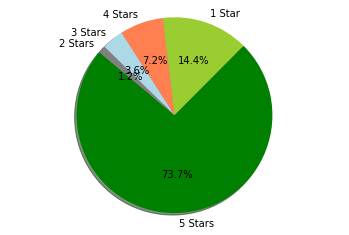

In [26]:

labels = '5 Stars', '1 Star', '4 Stars', '3 Stars', '2 Stars'
sizes = [reviewData.rating.value_counts()[0], reviewData.rating.value_counts()[1],reviewData.rating.value_counts()[2],reviewData.rating.value_counts()[3],reviewData.rating.value_counts()[4]]
colors = ['green', 'yellowgreen', 'coral', 'lightblue', 'grey']
explode = (0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [27]:
reviewData.body.head()

0    ['\n\n\n\n\n\n\n\n\n\n  \n  \n    ', '\n  So I...
1    ['\n\n\n\n\n\n\n\n\n\n  \n  \n    ', '\n  I ca...
2    ['\n\n\n\n\n\n\n\n\n\n  \n  \n    ', '\n  I’ve...
3    ['\n\n\n\n\n\n\n\n\n\n  \n  \n    ', "\n  I ha...
4    ['\n\n\n\n\n\n\n\n\n\n  \n  \n    ', '\n  Brou...
Name: body, dtype: object

In [28]:
# the latest review
max(reviewData.date)

"['Reviewed in the United Kingdom on 9 March 2021']"

In [29]:
# the oldest review
min(reviewData.date)

"['Reviewed in the United Kingdom on 1 February 2020']"

## The Text Analytics Starts

##### Calculate the number of words in each review

In [30]:
reviewsBodyWordCount = reviewData.body.apply(lambda x: len(str(x).split(" ")))

In [31]:
reviewsBodyWordCount.sort_values(ascending= False)

9    585
9    566
6    542
7    509
3    381
    ... 
7     16
5     16
0     16
1     15
2     15
Name: body, Length: 167, dtype: int64

In [32]:
reviewsBodyWordCount.nlargest(n=5, keep='first')

9    585
9    566
6    542
7    509
3    381
Name: body, dtype: int64

In [33]:
reviewsBodyWordCount.nsmallest(n=5, keep='first')

1    15
2    15
1    16
7    16
9    16
Name: body, dtype: int64

##### Calculate the number of characters in each review

In [34]:
reviewsBodyCharCount = reviewData.body.str.len() ## this also includes spaces

In [35]:
reviewsBodyCharCount.nlargest(n=5, keep='first')

9    3145
6    2989
9    2957
7    2762
3    2095
Name: body, dtype: int64

In [36]:
reviewsBodyCharCount.nsmallest(n=5, keep='first')

5    62
1    64
7    65
2    65
2    67
Name: body, dtype: int64

## Pre-processing starts

#### Convert all the words to lower case

In [37]:
type(reviewData.body.str)

pandas.core.strings.StringMethods

In [38]:
reviewData.head()

,author,body,date,helpful,rating,title
0,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n So I...",['Reviewed in the United Kingdom on 3 Septembe...,['2 people found this helpful'],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Great for th..."
1,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n I ca...",['Reviewed in the United Kingdom on 7 December...,[],['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Great system..."
2,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n I’ve...",['Reviewed in the United Kingdom on 10 January...,['One person found this helpful'],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Easy to fit ..."
3,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n I ha...",['Reviewed in the United Kingdom on 2 December...,[],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Installation..."
4,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n Brou...",['Reviewed in the United Kingdom on 13 August ...,['6 people found this helpful'],['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Looks the pa..."


In [39]:
reviewData.body = reviewData.body.str.lower()

In [40]:
# all the body reviews are converted to lowercase
reviewData.head()

,author,body,date,helpful,rating,title
0,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n so i...",['Reviewed in the United Kingdom on 3 Septembe...,['2 people found this helpful'],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Great for th..."
1,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n i ca...",['Reviewed in the United Kingdom on 7 December...,[],['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Great system..."
2,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n i’ve...",['Reviewed in the United Kingdom on 10 January...,['One person found this helpful'],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Easy to fit ..."
3,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', ""\n i ha...",['Reviewed in the United Kingdom on 2 December...,[],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Installation..."
4,[],"['\n\n\n\n\n\n\n\n\n\n \n \n ', '\n brou...",['Reviewed in the United Kingdom on 13 August ...,['6 people found this helpful'],['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Looks the pa..."


#### Remove the punctuations

In [41]:
reviewData.body = reviewData.body.str.replace('[^\w\s]','')

#### Remove the Stop Words, which are the commonly occuring words like the, a, an, is etc.

In [42]:
stop = stopwords.words('english')

In [43]:
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [44]:
reviewData.body.head()

0    nnnnnnnnnn n n n already phillips hue bulbs ar...
1    nnnnnnnnnn n n n cant comment installation pai...
2    nnnnnnnnnn n n n ive never fitted one healthy ...
3    nnnnnnnnnn n n n combi boiler internetenabled ...
4    nnnnnnnnnn n n n brought prime day sale got 95...
Name: body, dtype: object

##### These are the most comonly occuring words in our corpus. Depending on the requirement, we may remove or keep them. We are removing them here

In [45]:
freq = pd.Series(' '.join(reviewData.body).split()).value_counts()[:20]

In [46]:
freq

n             843
nnnnnnnnnn    167
hive          102
heating        89
thermostat     80
easy           78
boiler         56
install        53
get            50
use            48
set            45
app            45
home           37
works          36
would          36
control        35
one            34
great          33
really         33
hub            32
dtype: int64

In [47]:
freq = list(freq.index)
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [48]:
reviewData.body.head()

0    already phillips hue bulbs around house big fa...
1    cant comment installation paid local trader pr...
2    ive never fitted healthy interest everything d...
3    combi internetenabled 1 doesnt features upgrad...
4    brought prime day sale got 95 fitted quite str...
Name: body, dtype: object

##### Lets see which are the rare words, we are removing them

In [49]:
freq = pd.Series(' '.join(reviewData.body).split()).value_counts()[-10:]

In [50]:
freq

attention       1
anybody         1
informationn    1
activates       1
aspect          1
easytouse       1
chat            1
possible        1
confusing       1
270             1
dtype: int64

In [51]:
freq = list(freq.index)
reviewData.body = reviewData.body.apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#### Tokentization of reviews

In [52]:
from nltk.tokenize import word_tokenize

In [53]:
tokens = word_tokenize(reviewData.iloc[1,1])
print(tokens)

['cant', 'comment', 'installation', 'paid', 'local', 'trader', 'problems', 'using', 'system', 'think', 'brilliant', 'ive', 'major', 'issue', 'small', 'thing', 'schedule', 'next', 'morning', 'certain', 'time', 'didnt', 'come', 'planned', 'flawlessly', 'alexa', 'im', 'little', 'disappointed', 'screen', 'goes', 'seconds', 'save', 'battery', 'power', 'touch', 'see', 'temperature', 'check', 'overall', 'though', 'im', 'pleased', 'system', 'using', 'two', 'weeks', 'time', 'tell']


In [54]:
reviewData.iloc[1,1]

'cant comment installation paid local trader problems using system think brilliant ive major issue small thing schedule next morning certain time didnt come planned flawlessly alexa im little disappointed screen goes seconds save battery power touch see temperature check overall though im pleased system using two weeks time tell'

#### Doing Stemming, currenlty commented since we are preferring Lemit

In [239]:
#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#reviewData.body[:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    replac old 80 slide timer clock graviti fed st...
1    purchas model opt self bit research onlin manu...
2    purchas although reason savvi electr peer time...
3    instal black fridaycyb monday offer kit ship e...
4    love bought new combi realli best thing ive ev...
Name: body, dtype: object

#### Doing Lemmatization

In [55]:
from textblob import Word
reviewData.body = reviewData.body.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviewData.body.head()

0    already phillips hue bulb around house big fan...
1    cant comment installation paid local trader pr...
2    ive never fitted healthy interest everything d...
3    combi internetenabled 1 doesnt feature upgradi...
4    brought prime day sale got 95 fitted quite str...
Name: body, dtype: object

In [58]:
sentimentString = reviewData.iloc[1,1]

In [59]:
# append to this string 
for i in range(2,len(reviewData)):
    sentimentString = sentimentString + reviewData.iloc[i,1]

#### This is the Sentiment Analysis 

In [61]:
# the functions generates polarity and subjectivity here, subsetting the polarity only here
allReviewsSentiment = reviewData.body[:900].apply(lambda x: TextBlob(x).sentiment[0])

In [62]:
# this contains boths subjectivity and polarity
allReviewsSentimentComplete = reviewData.body[:900].apply(lambda x: TextBlob(x).sentiment)

In [63]:
allReviewsSentimentComplete.head()

0    (0.06315192743764173, 0.5116213151927438)
1    (0.12410714285714286, 0.4767857142857143)
2    (0.23928571428571432, 0.6821428571428572)
3    (0.07947781385281384, 0.3274756493506493)
4                  (0.04999999999999997, 0.45)
Name: body, dtype: object

In [64]:
allReviewsSentiment.to_csv(out_folder + 'ReviewsSentiment.csv')

In [ ]:
## get the respective counts for all the reviews
# if the polarity is above 0.75 Very Satisfied
# if the polarity is between 0.5-0.74 Satisfied
# if the polarity is between 0.2-0.5 Nice
# if the polarity is between -0.2 to 0.2 Neutral
# if the polarity is between -0.2 to -0.5 Dissatisfied
# if the polarity is between -0.5 to -0.74 Very Dissatisfied
# if the polarity is less than -0.75 Extremely Dissatisfied


In [65]:
allReviewsSentimentDF = allReviewsSentiment.to_frame()

In [66]:
allReviewsSentimentDF.head()

,body
0,0.063152
1,0.124107
2,0.239286
3,0.079478
4,0.050000


In [67]:
# Create a list to store the data
grades = []

# For each row in the column,
for row in allReviewsSentimentDF['body']:
    # if more than a value,
    if row >= 0.75:
       grades.append('Extremely Satisfied')
    elif (row >= 0.5) & (row < 0.75):
        grades.append('Satisfied')
    elif (row >= 0.2) & (row < 0.5):
        grades.append('Nice')
    elif (row >= -0.2) & (row < 0.2):
        grades.append('Neutral')
    elif (row > -0.5) & (row <= -0.2):
        grades.append('Bad')
    elif (row >= -0.75) & (row < -0.5):
        grades.append('Dis-satisfied')
    elif  row < -0.75:
        grades.append('Extremely Dis-satisfied')
    else:
        # Append a failing grade
        grades.append('No Sentiment')
        
# Create a column from the list
allReviewsSentimentDF['SentimentScore'] = grades

In [68]:
allReviewsSentimentDF.head()

,body,SentimentScore
0,0.063152,Neutral
1,0.124107,Neutral
2,0.239286,Nice
3,0.079478,Neutral
4,0.050000,Neutral


In [69]:
allReviewsSentimentDF.SentimentScore.value_counts()

Neutral                93
Nice                   43
Satisfied              19
Extremely Satisfied     9
Bad                     2
Dis-satisfied           1
Name: SentimentScore, dtype: int64

In [70]:
type(allReviewsSentimentDF.SentimentScore)

pandas.core.series.Series

<AxesSubplot:>

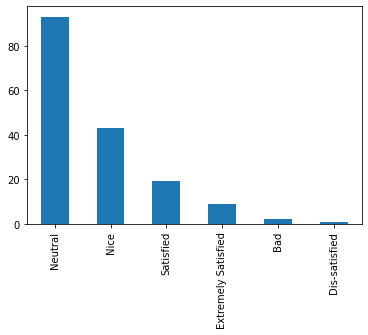

In [71]:
allReviewsSentimentDF['SentimentScore'].value_counts().plot(kind='bar')

In [72]:
reviewData.head()

,author,body,date,helpful,rating,title
0,[],already phillips hue bulb around house big fan...,['Reviewed in the United Kingdom on 3 Septembe...,['2 people found this helpful'],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Great for th..."
1,[],cant comment installation paid local trader pr...,['Reviewed in the United Kingdom on 7 December...,[],['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Great system..."
2,[],ive never fitted healthy interest everything d...,['Reviewed in the United Kingdom on 10 January...,['One person found this helpful'],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Easy to fit ..."
3,[],combi internetenabled 1 doesnt feature upgradi...,['Reviewed in the United Kingdom on 2 December...,[],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Installation..."
4,[],brought prime day sale got 95 fitted quite str...,['Reviewed in the United Kingdom on 13 August ...,['6 people found this helpful'],['4.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Looks the pa..."


In [73]:
len(reviewData)

167

In [74]:
#### Merge the review data with Sentiment generated

# add column Polarity Score
reviewData['polarityScore'] = allReviewsSentimentDF['body']



In [210]:
reviewData.head()

,author,body,date,helpful,rating,title,polarityScore
0,['Rob A.'],replaced old 80 slide timer clock gravity fed ...,['on 16 January 2018'],['115 people found this helpful'],['5.0 out of 5 stars'],"['Really useful, and sort of cool!']",0.347917
1,['S. Newton'],combi water tank unit arrived within couple da...,['on 26 December 2017'],['3 people found this helpful'],['4.0 out of 5 stars'],['Works fine with Alexa. Dubious about claimed...,0.247222
2,['JC'],bough together multizone phoned came installed...,['on 15 July 2017'],['3 people found this helpful'],['5.0 out of 5 stars'],['Have been perfectly happy with the installat...,0.266667
3,['Fionn'],delighted setup bought without ireland also bo...,['on 6 February 2017'],['One person found this helpful'],['5.0 out of 5 stars'],['Slick Simple Functionality'],0.235771
4,['Nemesis'],previously purchased drayton wiser wireless tr...,['on 5 March 2018'],[],['5.0 out of 5 stars'],"['Simple, elegant and just works.']",0.064484


In [75]:
negativeReviews = reviewData[reviewData.polarityScore < 0]

In [76]:
negativeReviews.head()

,author,body,date,helpful,rating,title,polarityScore
8,[],product proved pretty unreliable keep disconne...,['Reviewed in the United Kingdom on 23 March 2...,['2 people found this helpful'],['2.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Thermostat k...",-0.173611
3,[],struggled different expensive system since new...,['Reviewed in the United Kingdom on 25 May 2021'],[],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Simples', '\...",-0.015383
7,[],warning unit buggy firstly look blog unable co...,['Reviewed in the United Kingdom on 17 January...,[],['1.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Unfinished s...",-0.131250
3,[],cant without plumber wired dont thing hard min...,['Reviewed in the United Kingdom on 6 June 2020'],[],['5.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Easy to use ...",-0.291667
5,[],simply could pair begin didnt spot old program...,['Reviewed in the United Kingdom on 6 January ...,[],['3.0 out of 5 stars'],"['\n\n\n\n\n\n\n\n \n \n ', 'Struggled to...",-0.116667
